In [126]:
import os
import re
import pandas as pd

In [127]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [128]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [129]:
wikid = pd.read_json(os.path.join("data_raw","wikidata_raw.json"))

In [152]:
wikid.columns

Index(['100_7', '024_a', 'w_narozeni', 'w_umrti', 'w_gender', 'obcanstvi',
       'w_misto_narozeni', 'w_misto_umrti', 'profese', 'jazykove_verze',
       'skoly', 'manzelstvo', 'sourozenectvo', 'strany', 'potomstvo',
       'udalosti', 'druh_umrti', 'role', 'pricina_umrti', 'partnerstvo',
       'vezeni'],
      dtype='object')

In [130]:
wikid = wikid.reset_index(drop=False).rename(columns={"index": "100_7"})

In [131]:
df = df.merge(pd.read_parquet(os.path.join('data','cnb_vyber.parquet')), left_index=True, right_index=True, how="left")

In [132]:
df = df.explode('100_7')

In [133]:
df = df.merge(wikid, left_on='100_7', right_on='100_7', how='left')

In [134]:
df = df[(df['w_umrti'] >= df['rok']) | (df['w_umrti'].isnull())]

In [135]:
df

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,skoly,manzelstvo,sourozenectvo,strany,potomstvo,udalosti,druh_umrti,role,pricina_umrti,partnerstvo,vezeni
0,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47413,2024.0,Princezna na vdávání,Uhlíř Miroslav,None,240414s2024 xr a e 000 j cze,[978-80-11-04837-2],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-32)]","[aut, ill, pbl]",None,"[Uhlíř, Miroslav]",None,None,[Princezna na vdávání /],[Miroslav Uhlíř],None,None,None,[1. vydání],None,None,None,None,None,None,None,[Plzeň :],"[Miroslav Uhlíř,]",[2024],[1],[179 stran :],[ilustrace ;],[21 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české příběhy, Czech stories]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47414,2024.0,Slon v šuplíku,Nejedlý Jan,ola2003165587,240419s2024 xr a a 000 j cze,[978-80-262-2144-9],None,[(vázáno)],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-32, 821-93, (0:82-32)]",[aut],ola2003165587,"[N

In [136]:
df[df['100_a'].astype(str).str.contains('Poláček, Karel')]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,skoly,manzelstvo,sourozenectvo,strany,potomstvo,udalosti,druh_umrti,role,pricina_umrti,partnerstvo,vezeni
5812,1926.0,Povídky israelského vyznání,Poláček Karel,jk01100136,000217s1926 xr ||| | cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],[821.162.3-32],[aut],jk01100136,"[Poláček, Karel,]",[1892-1945],None,[Povídky israelského vyznání /],[Karel Poláček],None,None,None,None,None,[Praha :],"[Pokrok,]",[1926],None,None,None,None,None,None,None,[76 s. ;],None,[8°],[Dobrá četba ;],[sv. 11],None,None,None,None,None,None,None,None,None,None,None,None,[české povídky],None,None,None,None,None,None,None,None,[Dobrá četba (Pokrok)],None,None,nam a22 1 4500,Q571203,1892.0,1945.0,m,"[Q533534, Q33946]",[Q1000091],"[Q105084, Q7342, Q7341]","[Q36180, Q28389, Q1930187, Q69423232, Q876864]","[cs, it, ru, fr, sk, de, eo, fa, uk, en, arz]",[Q12047389],[Q105573892],"[Q105573905, Q105574064]",None,None,"[Q5883980, Q104055388, Q76358503]",None,[Q5883980],None,[Q95459535],"[Q7341, Q15111616]"
6855,1931.0,Hráči,Poláček Karel,jk01100136,991123s1931 xr a 000 1 cze,None,None,[(Brož.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0:82-321.5)]",[aut],jk01100136,"[Poláček, Karel,]",[1892-1945],None,[Hráči :],[Karel Poláček ; [ilustrace ... O. Mrkvičky]],None,None,None,None,None,[Praha :],"[Fr. Borový,]",[1931],[(v Brně :],[Polygrafia)],None,None,None,None,None,[223 s. :],[il. ;],[21 cm],[Knihy Karla Poláčka ;],[2],None,[Autor si v půvabné próze vzal na mušku svého ...,None,None,None,None,None,None,None,None,None,None,"[české prózy, humoristické prózy, Czech prose,...",None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,Q571203,1892.0,1945.0,m,"[Q533534, Q33946]",[Q1000091],"[Q105084, Q7342, Q7341]","[Q36180, Q28389, Q1930187, Q69423232, Q876864]","[cs, it, ru, fr, sk, de, eo, fa, uk, en, arz]",[Q12047389],[Q105573892],"[Q105573905, Q105574064]",None,None,"[Q5883980, Q104055388, Q76358503]",None,[Q5883980],None,[Q95459535],"[Q7341, Q15111616]"
6991,1932.0,Muži v offsidu,Poláček Karel,jk01100136,090903s1932 xr a g 000 f cze,None,None,[(Brož.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-311.5)]",[aut],jk01100136,"[Poláček, Karel,]",[1892-1945],None,[Muži v offsidu :],[Karel Poláček ; [ilustroval ... A. Pelc]],None,None,None,[3. vyd.],None,[Praha :],"[Fr. Borový,]",[1932],[(V Brně :],[Polygrafia)],None,None,None,None,None,[353 s. :],[il. ;],[20 cm],"[Knihy Karla Poláčka ;, Kmen]","[1, None]",None,None,None,None,None,None,None,None,None,None,None,None,"[české romány, humoristické romány]",[ill],[jk01092418],"[Pelc, Antonín,]",[1895-1967],None,None,None,None,[Kmen (Fr. Borový)],None,None,nam a22 a 4500,Q571203,1892.0,1945.0,m,"[Q533534, Q33946]",[Q1000091],"[Q105084, Q7342, Q7341]","[Q36180, Q28389, Q1930187, Q69423232, Q876864]","[cs, it, ru, fr, sk, de, eo, fa, uk, en, arz]",[Q12047389],[Q105573892],"[Q105573905, Q105574064]",None,None,"[Q5883980, Q104055388, Q76358503]",None,[Q5883980],None,[Q95459535],"[Q7341, Q15111616]"
7519,1935.0,Michelup a motocykl,Poláček Karel,jk01100136,990320s1935 xr g ||| f cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-311.5)]",[aut],jk01100136,"[Poláček, Karel,]",[1892-1945],None,[Michelup a motocykl :],[Karel Poláček],None,None,None,None,None,[Praha :],"[Fr. Borový,]",[1935],[(v Brně :],[Akc. mor. knihtiskárna Polygrafie)],None,None,None,None,None,"[408, [II] s. ;]",None,[8°],[Knihy Karla Poláčka 

In [137]:
df[df['strany'].astype(str).str.contains('Q',na=False)]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,skoly,manzelstvo,sourozenectvo,strany,potomstvo,udalosti,druh_umrti,role,pricina_umrti,partnerstvo,vezeni
3677,1900.0,V temných vírech,Stašek Antal,jk01120951,061128s1900 xr e 000 f cze,None,None,[(Brož.)],None,None,None,None,[821.162.3-3],[Česká próza],[821.162.3-31],[aut],jk01120951,"[Stašek, Antal,]",[1843-1931],None,[V temných vírech :],[Antal Stašek],[II /],None,None,None,None,[V Praze :],"[Jos. R. Vilímek,]",[[1900]],None,"[(Tiskem České grafické společnosti ""Unie"")]",None,None,None,None,None,[246 s. ;],None,[18 cm],[Vilímkova knihovna ;],"[roč. 3, sv. 16]",[Rok vyd. a sv. edice z bibliografického katal...,None,None,None,None,None,None,None,None,None,None,None,[české romány],None,None,None,None,None,None,None,None,[Vilímkova knihovna],None,None,nam a22 a 4500,Q3564937,1843.0,1931.0,m,"[Q33946, Q28513]",[Q12056071],"[Q1085, Q71976699]","[Q36180, Q14467526, Q1209498, Q49757, Q40348, ...","[cs, de, eo, ru, arz, it, en]",[Q189441],None,None,[Q471367],"[Q560390, Q106813313]",None,None,None,None,None,None
3710,1900.0,Oslava Husova,Reyl František,jk01102382,011108s1900 xr e 000 1 cze,None,None,[(Brož.)],None,None,None,None,[27],[Křesťanství. Křesťanská církev všeobecně. Ekl...,"[27-337, 27-9""14/15"", 27-1/-5, 27-58-021.56, 2...",[aut],jk01102382,"[Reyl, František,]",[1865-1935],None,[Oslava Husova /],[píše F.R. Skalický],None,None,None,None,None,[V Hradci Králové :],"[Politické družstvo tiskové,]",[1900],None,[(Biskupská knihtiskárna)],None,None,None,None,None,[36 s. ;],None,[17 cm],[Časové úvahy ;],"[roč. 4., č. 10]",[Název z obálky],None,None,None,None,"[14.-15. století, 19. století]","[duchovní tradice, křesťanští reformátoři, ref...",None,"[None, 14.-15. století, None, 19. století]","[None, Česko, Česko, Česko]",[Česko],None,[pojednání],None,None,None,None,None,None,None,None,[Časové úvahy (Politické družstvo tiskové)],None,None,nam a22 1 4500,Q12017454,1865.0,1935.0,m,[Q33946],[Q993952],[Q180139],"[Q2306091, Q250867, Q82955]",[cs],[Q12028998],None,None,"[Q12032234, Q1142687]",None,None,None,None,None,None,None
3756,1900.0,Zajímavé vzpomínky na činnost soudruhův a orga...,Hybeš Josef,jk01043378,010607s1900 xr e 000 1dcze,None,None,None,None,None,None,None,[329],[Politické strany a hnutí],"[329.14, (437.3), (0:82-94)]",[aut],jk01043378,"[Hybeš, Josef,]",[1850-1921],None,[Zajímavé vzpomínky na činnost soudruhův a org...,[píše Josef Hybeš],None,None,[Zajímavé vzpomínky na činnost soudruhův a org...,None,None,[V Brně :],"[Jos. Hybeš,]",[1900],None,[(Karel Habicht)],None,None,None,None,None,[68 s. ;],None,[15 cm],None,None,[Na frontispice portrét Emila Kaller-Reinthala...,None,None,None,None,[19. století],[sociální demokracie],None,[19. století],[Česko],None,None,[vzpomínky],None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,Q1253698,1850.0,1921.0,m,"[Q533534, Q33946]","[Q1027639, Q1013843]",[Q14960],"[Q82955, Q1930187, Q36180]","[cs, en, de]",None,[Q105756371],None,"[Q179111, Q341148, Q727724]",None,None,None,None,None,None,None
3757,1900.0,Zajímavé vzpomínky na činnost soudruhův a orga...,Hybeš Josef,jk01043378,010607s1900 xr e ||| 1dcze,None,None,None,None,None,None,None,[329],[Politické strany a hnutí],"[329.14, (437.3), (0:82-94)]",[aut],jk01043378,"[Hybeš, Josef,]",[1850-1921],None,[Zajímavé vzpomínky na činnost soudruhův a org...,[píše Josef Hybeš],"[II. díl,]",[Z prvních dob hnutí soudruhů českých /],"[Z prvních dob hnutí soudruhů českých, Tajné s...",None,None,[V Brně :],"[Jos. Hybeš,]",[1

In [138]:
strany = df[['strany']].explode('strany').groupby('strany').size().sort_values(ascending=False)

In [139]:
strany

strany
Q727724       971
Q341148        93
Q913567        45
Q5201761       38
Q1142687       38
Q341111        32
Q1713492       31
Q2568847       19
Q10728124      15
Q471367        14
Q1357724       12
Q651129        12
Q828099        11
Q62029790      10
Q5109507       10
Q110765080      9
Q1755236        9
Q12041671       8
Q13217548       7
Q2597822        5
Q1784683        5
Q12056893       5
Q631218         4
Q12032234       4
Q877730         4
Q12039497       4
Q64009604       3
Q12028996       3
Q54286014       3
Q11284133       3
Q11177679       3
Q29552          3
Q20058756       3
Q12033324       3
Q2296356        3
Q179111         2
Q14496453       2
Q79854          2
Q64521954       2
Q113501335      2
Q2565151        2
Q20901922       2
Q2514451        2
Q630355         1
Q29468          1
Q1450567        1
Q12041663       1
Q3790505        1
Q1267256        1
Q904070         1
Q90407911       1
Q327591         1
dtype: int64

In [140]:
vezeni = df[['vezeni']].explode('vezeni').groupby('vezeni').size().sort_values(ascending=False)
vezeni

vezeni
Q15111616    143
Q318861      116
Q7341        103
Q152802       66
Q151198       62
Q154498       16
Q160268        7
Q160139        6
Q312478        4
Q7332          4
Q159483        2
Q327895        1
dtype: int64

In [141]:
df[df['udalosti'].astype(str).str.contains('Q5883980',na=False)]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,skoly,manzelstvo,sourozenectvo,strany,potomstvo,udalosti,druh_umrti,role,pricina_umrti,partnerstvo,vezeni
5812,1926.0,Povídky israelského vyznání,Poláček Karel,jk01100136,000217s1926 xr ||| | cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],[821.162.3-32],[aut],jk01100136,"[Poláček, Karel,]",[1892-1945],None,[Povídky israelského vyznání /],[Karel Poláček],None,None,None,None,None,[Praha :],"[Pokrok,]",[1926],None,None,None,None,None,None,None,[76 s. ;],None,[8°],[Dobrá četba ;],[sv. 11],None,None,None,None,None,None,None,None,None,None,None,None,[české povídky],None,None,None,None,None,None,None,None,[Dobrá četba (Pokrok)],None,None,nam a22 1 4500,Q571203,1892.0,1945.0,m,"[Q533534, Q33946]",[Q1000091],"[Q105084, Q7342, Q7341]","[Q36180, Q28389, Q1930187, Q69423232, Q876864]","[cs, it, ru, fr, sk, de, eo, fa, uk, en, arz]",[Q12047389],[Q105573892],"[Q105573905, Q105574064]",None,None,"[Q5883980, Q104055388, Q76358503]",None,[Q5883980],None,[Q95459535],"[Q7341, Q15111616]"
6855,1931.0,Hráči,Poláček Karel,jk01100136,991123s1931 xr a 000 1 cze,None,None,[(Brož.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0:82-321.5)]",[aut],jk01100136,"[Poláček, Karel,]",[1892-1945],None,[Hráči :],[Karel Poláček ; [ilustrace ... O. Mrkvičky]],None,None,None,None,None,[Praha :],"[Fr. Borový,]",[1931],[(v Brně :],[Polygrafia)],None,None,None,None,None,[223 s. :],[il. ;],[21 cm],[Knihy Karla Poláčka ;],[2],None,[Autor si v půvabné próze vzal na mušku svého ...,None,None,None,None,None,None,None,None,None,None,"[české prózy, humoristické prózy, Czech prose,...",None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,Q571203,1892.0,1945.0,m,"[Q533534, Q33946]",[Q1000091],"[Q105084, Q7342, Q7341]","[Q36180, Q28389, Q1930187, Q69423232, Q876864]","[cs, it, ru, fr, sk, de, eo, fa, uk, en, arz]",[Q12047389],[Q105573892],"[Q105573905, Q105574064]",None,None,"[Q5883980, Q104055388, Q76358503]",None,[Q5883980],None,[Q95459535],"[Q7341, Q15111616]"
6991,1932.0,Muži v offsidu,Poláček Karel,jk01100136,090903s1932 xr a g 000 f cze,None,None,[(Brož.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-311.5)]",[aut],jk01100136,"[Poláček, Karel,]",[1892-1945],None,[Muži v offsidu :],[Karel Poláček ; [ilustroval ... A. Pelc]],None,None,None,[3. vyd.],None,[Praha :],"[Fr. Borový,]",[1932],[(V Brně :],[Polygrafia)],None,None,None,None,None,[353 s. :],[il. ;],[20 cm],"[Knihy Karla Poláčka ;, Kmen]","[1, None]",None,None,None,None,None,None,None,None,None,None,None,None,"[české romány, humoristické romány]",[ill],[jk01092418],"[Pelc, Antonín,]",[1895-1967],None,None,None,None,[Kmen (Fr. Borový)],None,None,nam a22 a 4500,Q571203,1892.0,1945.0,m,"[Q533534, Q33946]",[Q1000091],"[Q105084, Q7342, Q7341]","[Q36180, Q28389, Q1930187, Q69423232, Q876864]","[cs, it, ru, fr, sk, de, eo, fa, uk, en, arz]",[Q12047389],[Q105573892],"[Q105573905, Q105574064]",None,None,"[Q5883980, Q104055388, Q76358503]",None,[Q5883980],None,[Q95459535],"[Q7341, Q15111616]"
7519,1935.0,Michelup a motocykl,Poláček Karel,jk01100136,990320s1935 xr g ||| f cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-311.5)]",[aut],jk01100136,"[Poláček, Karel,]",[1892-1945],None,[Michelup a motocykl :],[Karel Poláček],None,None,None,None,None,[Praha :],"[Fr. Borový,]",[1935],[(v Brně :],[Akc. mor. knihtiskárna Polygrafie)],None,None,None,None,None,"[408, [II] s. ;]",None,[8°],[Knihy Karla Poláčka 

<Axes: xlabel='rok'>

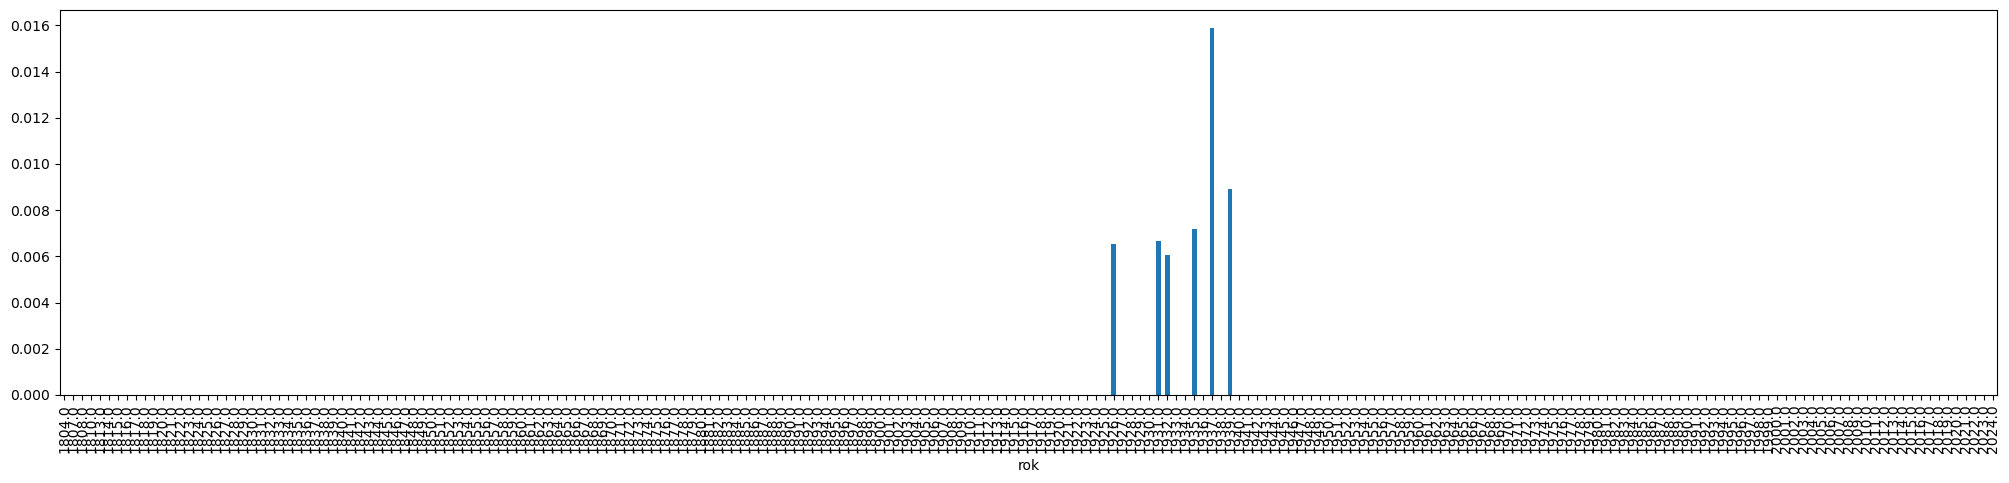

In [142]:
pd.Series(df[df['udalosti'].astype(str).str.contains('Q5883980',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

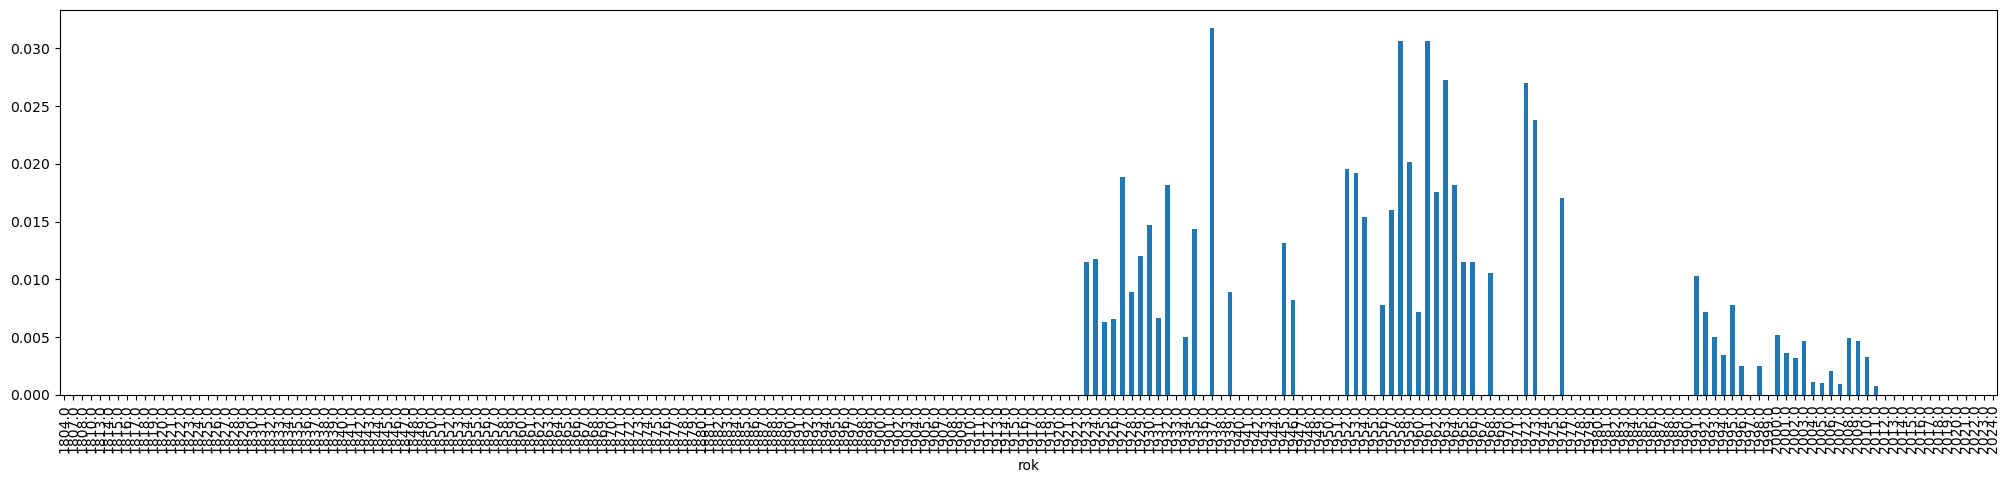

In [143]:
pd.Series(df[df['vezeni'].astype(str).str.contains('Q7341',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

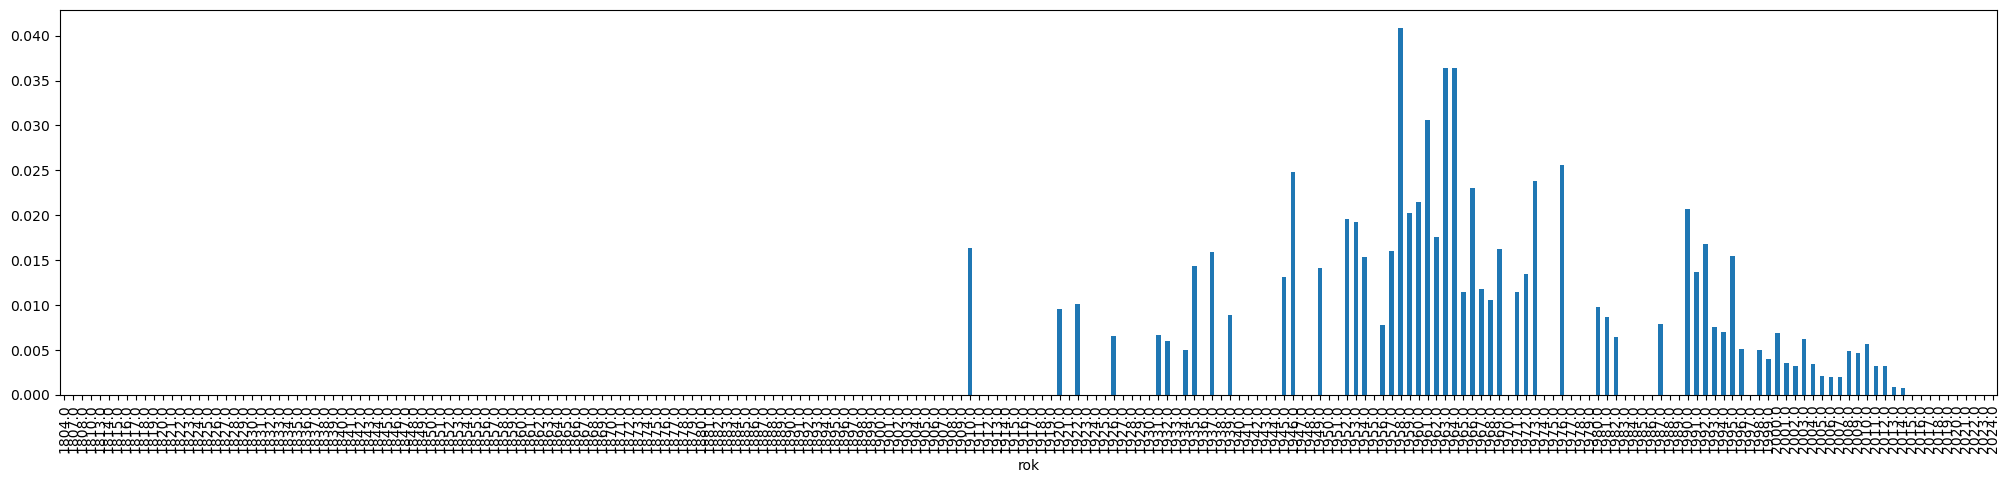

In [144]:
pd.Series(df[df['vezeni'].astype(str).str.contains('Q15111616',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

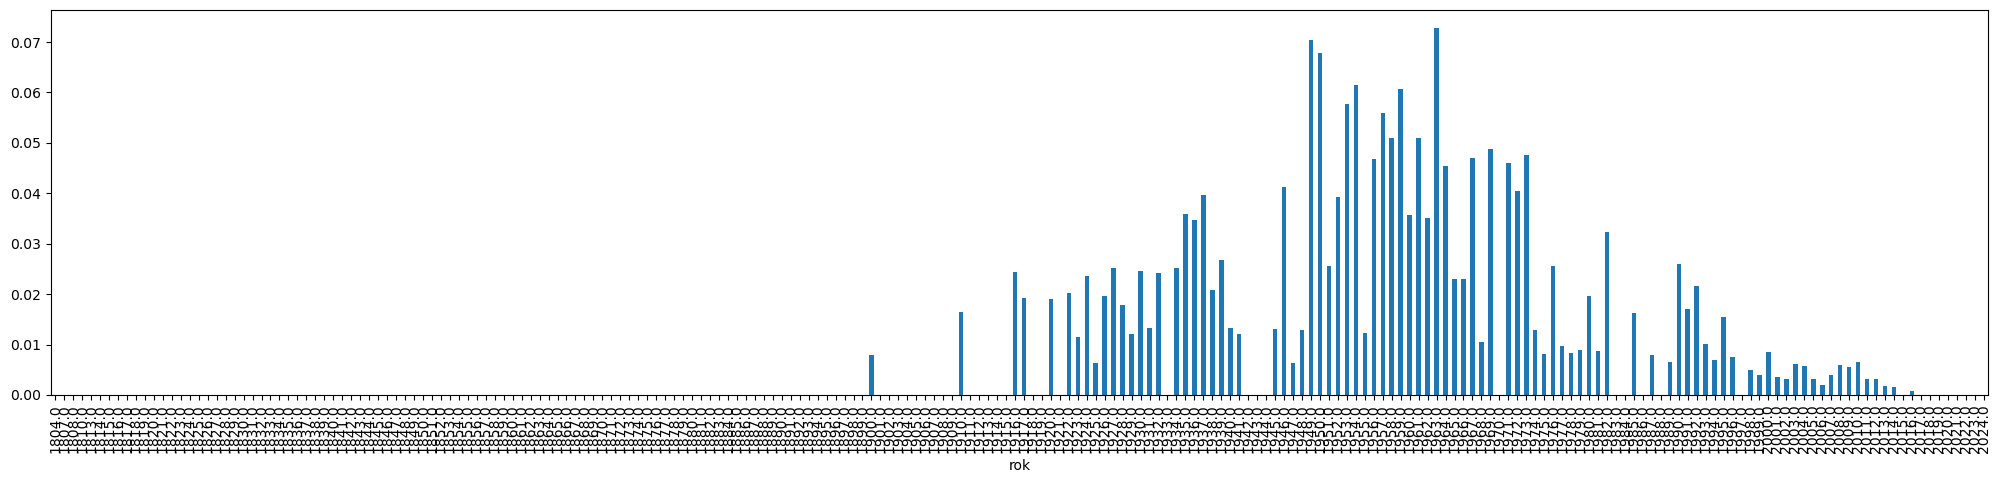

In [145]:
pd.Series(df[df['vezeni'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

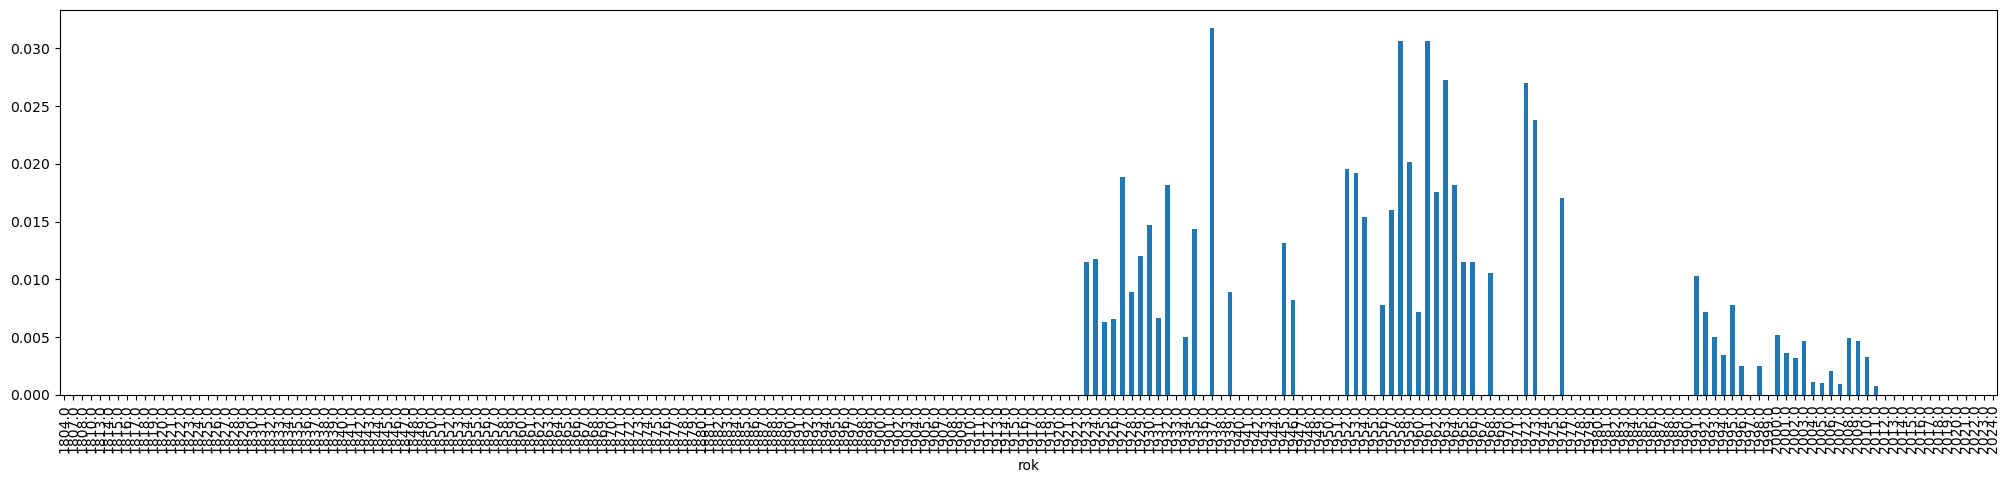

In [146]:
pd.Series(df[df['vezeni'].astype(str).str.contains('Q7341',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [147]:
df[df['strany'].astype(str).str.contains('Q1713492',na=False)].groupby('rok').size()

rok
1901.0    4
1902.0    4
1903.0    1
1905.0    3
1906.0    1
1907.0    1
1909.0    1
1910.0    1
1914.0    1
1916.0    1
1920.0    1
1921.0    2
1922.0    1
1925.0    1
1927.0    2
1928.0    2
1929.0    1
1932.0    1
1937.0    1
1948.0    1
dtype: int64

In [148]:
df[df['strany'].astype(str).str.contains('Q1713492',na=False)]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,skoly,manzelstvo,sourozenectvo,strany,potomstvo,udalosti,druh_umrti,role,pricina_umrti,partnerstvo,vezeni
3824,1901.0,Bludičky,Klecanda Jan,jk01060320,000202s1901 xr g 000 f cze,None,None,[(Brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],jk01060320,"[Klecanda, Jan,]",[1855-1920],None,[Bludičky :],[Jan Klecanda],None,None,None,None,None,None,None,None,None,None,None,[V Praze],"[Jos. R. Vilímek,]",[[1901?]],[1],[512 stran ;],None,[19 cm],[Spisy Jana Klecandy ;],[II.],None,None,None,None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 1i 4500,Q4223467,1855.0,1920.0,m,None,[Q1085],"[Q1085, Q753219]","[Q36180, Q1930187, Q37226, Q876864]","[cs, ru]",None,[Q97037188],None,[Q1713492],"[Q23908504, Q11906129, Q51798058]",None,None,None,None,None,None
3826,1901.0,Tvrdé hlavy,Klecanda Jan,jk01060320,000203s1901 xr e 000 1 cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],[821.162.3-3],[aut],jk01060320,"[Klecanda, Jan,]",[1855-1920],None,[Tvrdé hlavy :],[Jan Klecanda],None,None,None,None,None,[V Praze :],"[Jos. R. Vilímek,]",[[1901]],None,None,None,None,None,None,None,[283 s. ;],None,[18 cm],[Spisy Jana Klecandy ;],[1],None,None,None,None,None,None,None,None,None,None,None,None,[české prózy],None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,Q4223467,1855.0,1920.0,m,None,[Q1085],"[Q1085, Q753219]","[Q36180, Q1930187, Q37226, Q876864]","[cs, ru]",None,[Q97037188],None,[Q1713492],"[Q23908504, Q11906129, Q51798058]",None,None,None,None,None,None
3862,1901.0,Věra Budinská,Hořica Ignát,jk01042344,000324s1901 xr e 000 f cze,None,None,[(Váz.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],jk01042344,"[Hořica, Ignát,]",[1859-1902],None,[Věra Budinská :],[popisuje Ignát Hořica],None,None,None,None,None,[[Plzeň] :],"[Plzeňský obzor,]",[1901],None,None,None,None,None,None,None,[262 s. ;],None,[16 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,[české romány],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,Q7940602,1859.0,1902.0,m,[Q533534],[Q14960],"[Q23482, Q12034982]","[Q333634, Q1930187, Q36180, Q82955, Q12144794,...",[cs],None,[Q7940629],None,[Q1713492],None,None,None,None,Q389735,None,None
3865,1901.0,Staří mládenci a jiné povídky,Viková-Kunětická Božena,jk01142347,020910s1901 xr e 000 j cze,None,None,[(Váz.)],None,None,None,None,[821.162.3-3],[Česká próza],[821.162.3-32],[aut],jk01142347,"[Viková-Kunětická, Božena,]",[1862-1934],None,[Staří mládenci a jiné povídky /],[Božena Viková Kunětická],None,None,None,None,None,[V Praze :],"[F. Šimáček,]",[1901],None,None,None,None,None,None,None,[147 s. ;],None,[16 cm],"[Libuše, matice zábavy a vědění ;]","[31, 3]",None,None,None,None,None,None,None,None,None,None,None,None,[české povídky],None,None,None,None,None,None,None,None,"[Libuše, matice zábavy a vědění]",None,None,nam a22 1 4500,Q7168155,1862.0,1934.0,f,"[Q131964, Q533534, Q33946]",[Q36989],[Q608449],"[Q36180, Q214917, Q49757, Q82955, Q2259451]","[sv, fr, cs, de, sk, pl, en]",None,None,None,[Q1713492],None,None,None,None,None,None,None
3897,1902.0,Divoké koření,Klecanda Jan,jk01060320,010625s1902 xr a e 000 j cze,None,None,[(Váz.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0:82-321.5)]",[aut],jk01060320,"[Klecanda, Jan,]",[1855-1920],None,[Divoké koření :],"[Jan Klec

<Axes: xlabel='rok'>

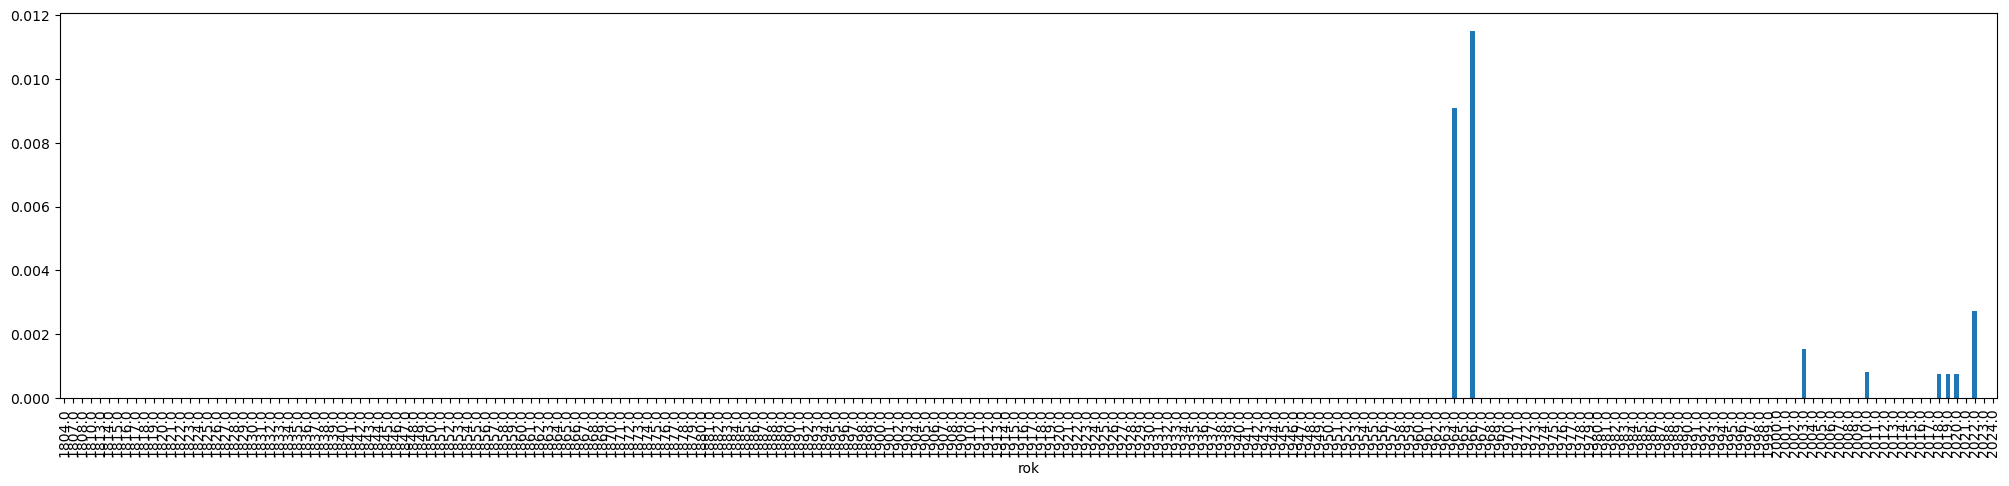

In [149]:
pd.Series(df[df['strany'].astype(str).str.contains('Q828099',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

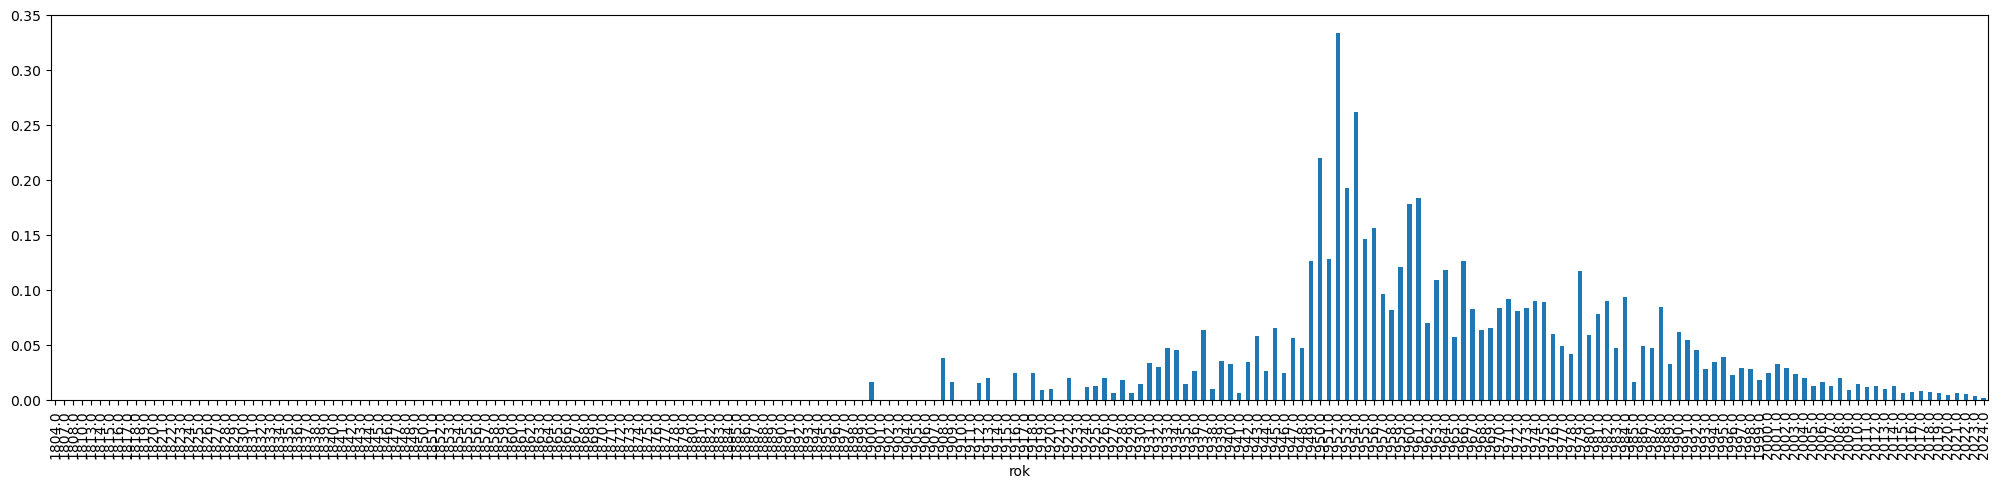

In [150]:
pd.Series(df[df['strany'].astype(str).str.contains('Q727724',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [160]:
df.explode('udalosti').groupby('udalosti').size().nlargest(10)

udalosti
Q49836        81
Q7519600      68
Q76358450     68
Q104055289    50
Q99850636     36
Q451987       28
Q104055393    18
Q104055395    13
Q2401485       8
Q104055388     7
dtype: int64

<Axes: xlabel='rok'>

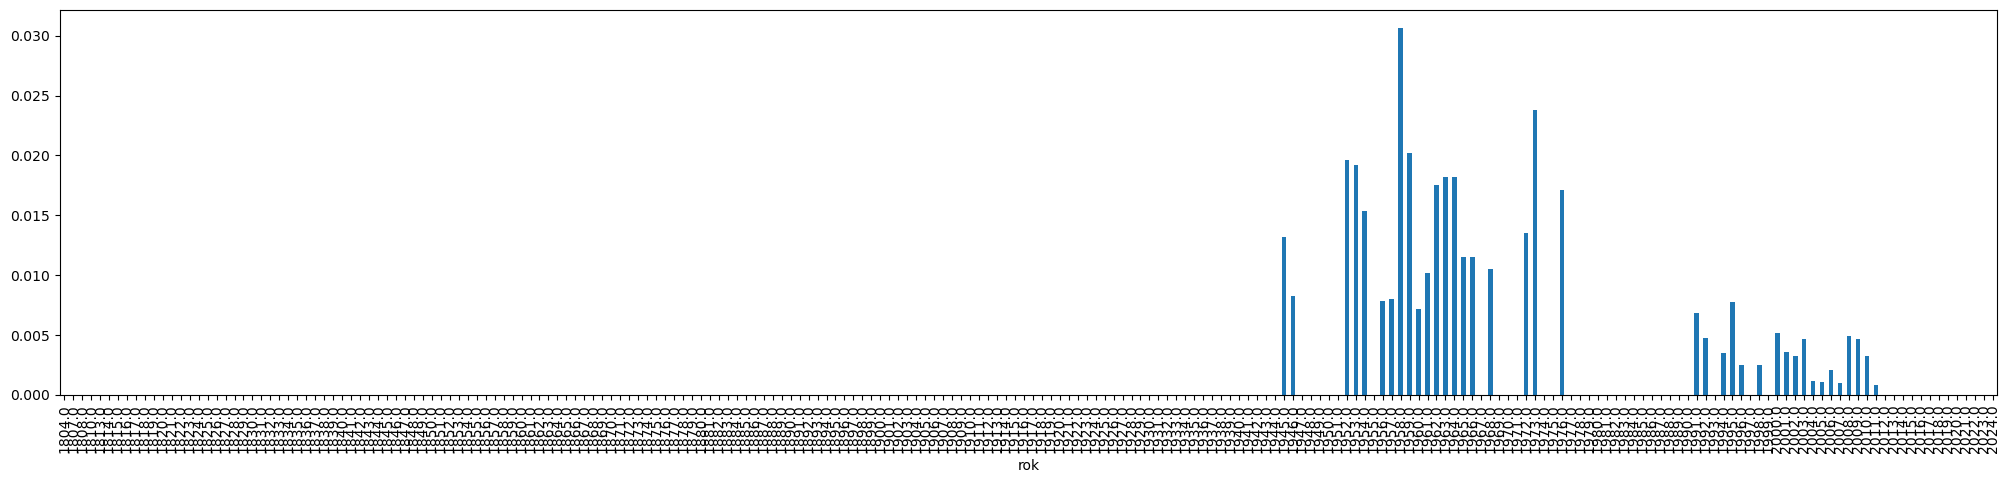

In [158]:
pd.Series(df[df['udalosti'].astype(str).str.contains('Q76358450',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))